In [ ]:
%env NOMIC_API_KEY=nk-4H

In [19]:
from langchain_nomic.embeddings import NomicEmbeddings

embeddings = NomicEmbeddings(model="nomic-embed-text-v1.5")

In [3]:
embeddings.embed_query("My query to look up")

[-0.014556885,
 0.042907715,
 -0.19152832,
 -0.026611328,
 0.04434204,
 -0.021774292,
 0.04977417,
 0.025512695,
 0.041381836,
 0.0018663406,
 0.022338867,
 0.040771484,
 0.055603027,
 -0.015525818,
 -0.028305054,
 0.0072402954,
 0.028625488,
 -0.09265137,
 -0.005065918,
 0.006893158,
 -0.044281006,
 -0.06561279,
 -0.03036499,
 0.066711426,
 0.040863037,
 -0.016738892,
 -0.03265381,
 0.018630981,
 -0.057159424,
 0.044006348,
 0.026428223,
 0.0009665489,
 0.008293152,
 -0.02734375,
 0.0045661926,
 -0.004306793,
 0.019805908,
 0.044067383,
 0.008934021,
 0.032958984,
 0.03186035,
 0.0025367737,
 -0.0054473877,
 -0.065979004,
 0.032409668,
 -0.023498535,
 0.05596924,
 0.015716553,
 0.072509766,
 -0.044281006,
 -0.023040771,
 -0.0048294067,
 0.027633667,
 -0.06201172,
 0.076538086,
 0.015930176,
 0.0390625,
 0.008224487,
 0.013786316,
 0.02178955,
 0.12438965,
 0.001045227,
 0.013343811,
 0.06173706,
 0.0236969,
 -0.056121826,
 -0.033050537,
 0.047058105,
 -0.026657104,
 -0.040130615,
 -0.

In [1]:
import pickle

# Replace 'your_file_path.pkl' with the path to your .pkl file
file_path = 'splitDocuments.pkl'

with open(file_path, 'rb') as file:
    contents = pickle.load(file)

def print_limited_structure(data, limit=5):
    """Print a limited view of the data structure."""
    if isinstance(data, dict):
        print("Dictionary with keys: values")
        for i, (key, value) in enumerate(data.items()):
            print(f"Key: {key}, Value type: {type(value)}, Value preview: {str(value)[:50]}")
            if i >= limit - 1:
                break
    elif isinstance(data, list):
        print("List with elements")
        for i in range(min(limit, len(data))):
            print(f"Index: {i}, Value type: {type(data[i])}, Value preview: {str(data[i])[:50]}")
    elif isinstance(data, (set, tuple)):
        print(f"{type(data).__name__} with elements")
        for i, item in enumerate(data):
            print(f"Element: {i}, Value type: {type(item)}, Value preview: {str(item)[:50]}")
            if i >= limit - 1:
                break
    else:
        print("Data type:", type(data))
        print(f"Preview: {str(data)[:200]}")  # Print the first 200 characters

print_limited_structure(contents)


List with elements
Index: 0, Value type: <class 'list'>, Value preview: [Document(page_content='3 2 0 2\n\nl u J\n\n0 1\n\
Index: 1, Value type: <class 'list'>, Value preview: [Document(page_content="About Scotty\n\nThe Scotti
Index: 2, Value type: <class 'list'>, Value preview: [Document(page_content='Sweepstakes Slang\n\nBuggy
Index: 3, Value type: <class 'list'>, Value preview: [Document(page_content='2024-2025 OFFICIAL Academi
Index: 4, Value type: <class 'list'>, Value preview: [Document(page_content='Andrew Carnegie\n\nA self-


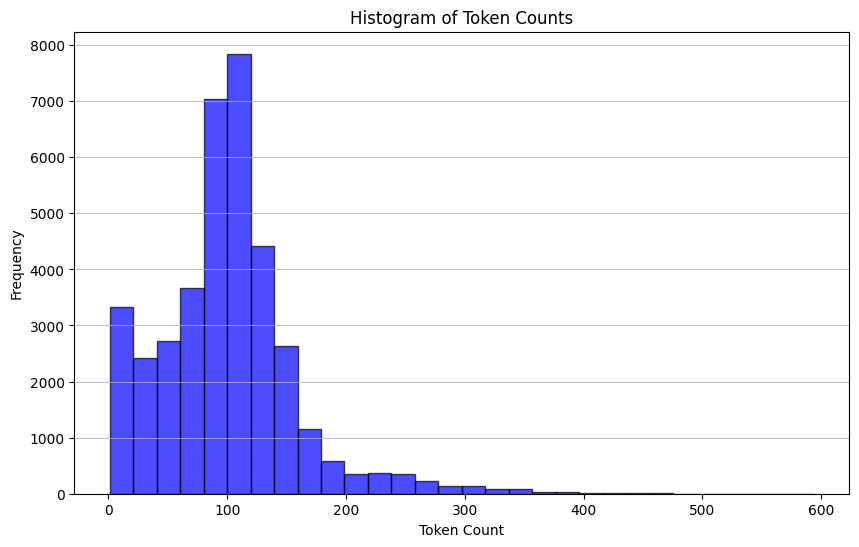

In [2]:
import matplotlib.pyplot as plt
import tiktoken

# Assuming contents is your loaded .pkl data and is a list of lists
# where each sublist contains document objects with a page_content attribute

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    # Disable the check for all special tokens
    num_tokens = len(encoding.encode(string, disallowed_special=()))
    return num_tokens


# Extracting page_content from each document object
docs_texts = []
for sublist in contents:
    for doc in sublist:  # Assuming each element in sublist is a document object
        docs_texts.append(doc.page_content)

# Calculate the number of tokens for each document's page_content
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]

# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show()


In [5]:
print(docs_texts[0:10])

['3 2 0 2\n\nl u J\n\n0 1\n\n] L C . s c [\n\n2 v 5 8 1 8 1 . 5 0 3 2 : v i X r a\n\nSyntax and Semantics Meet in the “Middle”: Probing the Syntax-Semantics Interface of LMs Through Agentivity\n\nLindia Tjuatja, Emmy Liu, Lori Levin, Graham Neubig Language Technologies Institute Carnegie Mellon University {ltjuatja, mengyan3, lsl, gneubig}@cs.cmu.edu\n\n1\n\nAbstract', 'Recent advances in large language models have prompted researchers to examine their abilities across a variety of linguistic tasks, but little has been done to investigate how models han- dle the interactions in meaning across words and larger syntactic forms—i.e. phenomena at the intersection of syntax and semantics. We present the semantic notion of agentivity as a case study for probing such interactions. We created a novel evaluation dataset by utilitiz- ing the unique linguistic properties', 'of a sub- set of optionally transitive English verbs. This dataset was used to prompt varying sizes of three model classes t

In [1]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("Salesforce/SFR-Embedding-Mistral")

/home/trevea/miniconda3/envs/nlp-rag/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]


In [51]:
import torch
print(torch.cuda.is_available())


True


In [3]:
import torch
from sentence_transformers import SentenceTransformer, util
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SentenceTransformer("Salesforce/SFR-Embedding-Mistral", device=device)

/home/trevea/miniconda3/envs/nlp-rag/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]


In [48]:
embeddings = model.encode("Testing")

In [49]:
print(embeddings)

[ 3.7783623 -0.5919665  4.3199406 ...  7.873832  -7.350942   2.5289717]


In [50]:
embeddings = ''

In [6]:
import numpy as np

# Assuming docs_texts 
embeddings = np.array([model.encode(doc) for doc in docs_texts])

In [4]:
from typing import Dict, List, Optional, Tuple

import numpy as np
import pandas as pd
import umap
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from sklearn.mixture import GaussianMixture

print("Imported Modules")

Imported Modules


In [5]:
RANDOM_SEED = 224  # Fixed seed for reproducibility

### --- Code from citations referenced above (added comments and docstrings) --- ###


def global_cluster_embeddings(
    embeddings: np.ndarray,
    dim: int,
    n_neighbors: Optional[int] = None,
    metric: str = "cosine",
) -> np.ndarray:
    """
    Perform global dimensionality reduction on the embeddings using UMAP.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for the reduced space.
    - n_neighbors: Optional; the number of neighbors to consider for each point.
                   If not provided, it defaults to the square root of the number of embeddings.
    - metric: The distance metric to use for UMAP.

    Returns:
    - A numpy array of the embeddings reduced to the specified dimensionality.
    """
    if n_neighbors is None:
        n_neighbors = int((len(embeddings) - 1) ** 0.5)
    return umap.UMAP(
        n_neighbors=n_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


def local_cluster_embeddings(
    embeddings: np.ndarray, dim: int, num_neighbors: int = 10, metric: str = "cosine"
) -> np.ndarray:
    """
    Perform local dimensionality reduction on the embeddings using UMAP, typically after global clustering.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for the reduced space.
    - num_neighbors: The number of neighbors to consider for each point.
    - metric: The distance metric to use for UMAP.

    Returns:
    - A numpy array of the embeddings reduced to the specified dimensionality.
    """
    return umap.UMAP(
        n_neighbors=num_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


def get_optimal_clusters(
    embeddings: np.ndarray, max_clusters: int = 50, random_state: int = RANDOM_SEED
) -> int:
    """
    Determine the optimal number of clusters using the Bayesian Information Criterion (BIC) with a Gaussian Mixture Model.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - max_clusters: The maximum number of clusters to consider.
    - random_state: Seed for reproducibility.

    Returns:
    - An integer representing the optimal number of clusters found.
    """
    max_clusters = min(max_clusters, len(embeddings))
    n_clusters = np.arange(1, max_clusters)
    bics = []
    for n in n_clusters:
        gm = GaussianMixture(n_components=n, random_state=random_state)
        gm.fit(embeddings)
        bics.append(gm.bic(embeddings))
    return n_clusters[np.argmin(bics)]


def GMM_cluster(embeddings: np.ndarray, threshold: float, random_state: int = 0):
    """
    Cluster embeddings using a Gaussian Mixture Model (GMM) based on a probability threshold.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - threshold: The probability threshold for assigning an embedding to a cluster.
    - random_state: Seed for reproducibility.

    Returns:
    - A tuple containing the cluster labels and the number of clusters determined.
    """
    n_clusters = get_optimal_clusters(embeddings)
    gm = GaussianMixture(n_components=n_clusters, random_state=random_state)
    gm.fit(embeddings)
    probs = gm.predict_proba(embeddings)
    labels = [np.where(prob > threshold)[0] for prob in probs]
    return labels, n_clusters


def perform_clustering(
    embeddings: np.ndarray,
    dim: int,
    threshold: float,
) -> List[np.ndarray]:
    """
    Perform clustering on the embeddings by first reducing their dimensionality globally, then clustering
    using a Gaussian Mixture Model, and finally performing local clustering within each global cluster.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for UMAP reduction.
    - threshold: The probability threshold for assigning an embedding to a cluster in GMM.

    Returns:
    - A list of numpy arrays, where each array contains the cluster IDs for each embedding.
    """
    if len(embeddings) <= dim + 1:
        # Avoid clustering when there's insufficient data
        return [np.array([0]) for _ in range(len(embeddings))]

    # Global dimensionality reduction
    reduced_embeddings_global = global_cluster_embeddings(embeddings, dim)
    # Global clustering
    global_clusters, n_global_clusters = GMM_cluster(
        reduced_embeddings_global, threshold
    )

    all_local_clusters = [np.array([]) for _ in range(len(embeddings))]
    total_clusters = 0

    # Iterate through each global cluster to perform local clustering
    for i in range(n_global_clusters):
        # Extract embeddings belonging to the current global cluster
        global_cluster_embeddings_ = embeddings[
            np.array([i in gc for gc in global_clusters])
        ]

        if len(global_cluster_embeddings_) == 0:
            continue
        if len(global_cluster_embeddings_) <= dim + 1:
            # Handle small clusters with direct assignment
            local_clusters = [np.array([0]) for _ in global_cluster_embeddings_]
            n_local_clusters = 1
        else:
            # Local dimensionality reduction and clustering
            reduced_embeddings_local = local_cluster_embeddings(
                global_cluster_embeddings_, dim
            )
            local_clusters, n_local_clusters = GMM_cluster(
                reduced_embeddings_local, threshold
            )

        # Assign local cluster IDs, adjusting for total clusters already processed
        for j in range(n_local_clusters):
            local_cluster_embeddings_ = global_cluster_embeddings_[
                np.array([j in lc for lc in local_clusters])
            ]
            indices = np.where(
                (embeddings == local_cluster_embeddings_[:, None]).all(-1)
            )[1]
            for idx in indices:
                all_local_clusters[idx] = np.append(
                    all_local_clusters[idx], j + total_clusters
                )

        total_clusters += n_local_clusters

    return all_local_clusters


In [8]:
### --- Our code below --- ###


# Previously, embed_cluster_texts was designed to take texts, embed them, and then cluster.
# Now, you have pre-computed embeddings, so you modify your approach to directly use those embeddings.

def cluster_texts_with_precomputed_embeddings(embeddings):
    """
    Clusters texts using precomputed embeddings and returns a DataFrame with cluster labels.

    Parameters:
    - embeddings: numpy.ndarray, the precomputed embeddings for the texts.

    Returns:
    - pandas.DataFrame: A DataFrame containing the original texts and the assigned cluster labels.
    """
    # Assuming perform_clustering is a function you've defined that expects embeddings
    # and returns cluster labels (modify this part according to your actual clustering implementation)
    cluster_labels = perform_clustering(embeddings, dim=10, threshold=0.1)  # Example parameters

    df = pd.DataFrame()  # Initialize a DataFrame to store the results
    df["text"] = docs_texts  # Store original texts
    df["embd"] = list(embeddings)  # Store embeddings as a list in the DataFrame
    df["cluster"] = cluster_labels  # Store cluster labels
    return df


def embed(texts):
    """
    Generate embeddings for a list of text documents.

    This function assumes the existence of an `embd` object with a method `embed_documents`
    that takes a list of texts and returns their embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be embedded.

    Returns:
    - numpy.ndarray: An array of embeddings for the given text documents.
    """
    text_embeddings = model.encode(texts)
    text_embeddings_np = np.array(text_embeddings)
    return text_embeddings_np


def embed_cluster_texts(texts):
    """
    Embeds a list of texts and clusters them, returning a DataFrame with texts, their embeddings, and cluster labels.

    This function combines embedding generation and clustering into a single step. It assumes the existence
    of a previously defined `perform_clustering` function that performs clustering on the embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be processed.

    Returns:
    - pandas.DataFrame: A DataFrame containing the original texts, their embeddings, and the assigned cluster labels.
    """
    text_embeddings_np = embed(texts)  # Generate embeddings
    cluster_labels = perform_clustering(
        text_embeddings_np, 10, 0.1
    )  # Perform clustering on the embeddings
    df = pd.DataFrame()  # Initialize a DataFrame to store the results
    df["text"] = texts  # Store original texts
    df["embd"] = list(text_embeddings_np)  # Store embeddings as a list in the DataFrame
    df["cluster"] = cluster_labels  # Store cluster labels
    return df


def fmt_txt(df: pd.DataFrame) -> str:
    """
    Formats the text documents in a DataFrame into a single string.

    Parameters:
    - df: DataFrame containing the 'text' column with text documents to format.

    Returns:
    - A single string where all text documents are joined by a specific delimiter.
    """
    unique_txt = df["text"].tolist()
    return "--- --- \n --- --- ".join(unique_txt)


def embed_cluster_summarize_texts(
    texts: List[str], level: int
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Embeds, clusters, and summarizes a list of texts. This function first generates embeddings for the texts,
    clusters them based on similarity, expands the cluster assignments for easier processing, and then summarizes
    the content within each cluster.

    Parameters:
    - texts: A list of text documents to be processed.
    - level: An integer parameter that could define the depth or detail of processing.

    Returns:
    - Tuple containing two DataFrames:
      1. The first DataFrame (`df_clusters`) includes the original texts, their embeddings, and cluster assignments.
      2. The second DataFrame (`df_summary`) contains summaries for each cluster, the specified level of detail,
         and the cluster identifiers.
    """

    # Embed and cluster the texts, resulting in a DataFrame with 'text', 'embd', and 'cluster' columns
    df_clusters = embed_cluster_texts(texts)

    # Prepare to expand the DataFrame for easier manipulation of clusters
    expanded_list = []

    # Expand DataFrame entries to document-cluster pairings for straightforward processing
    for index, row in df_clusters.iterrows():
        for cluster in row["cluster"]:
            expanded_list.append(
                {"text": row["text"], "embd": row["embd"], "cluster": cluster}
            )

    # Create a new DataFrame from the expanded list
    expanded_df = pd.DataFrame(expanded_list)

    # Retrieve unique cluster identifiers for processing
    all_clusters = expanded_df["cluster"].unique()

    print(f"--Generated {len(all_clusters)} clusters--")

    # Summarization
    template = """Here is a sub-set of information about language Technology Institute Faculty at Carnegie Mellon University (CMU).  
    Give a detailed summary of the documentation provided.
    Documentation:
    {context}
    """
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | llm | StrOutputParser()


    # Format text within each cluster for summarization
    summaries = []

    for i in all_clusters:
        df_cluster = expanded_df[expanded_df["cluster"] == i]
        formatted_txt = fmt_txt(df_cluster)
    #   Split formatted_txt if it's too long
        if len(formatted_txt) > 2000:  # Adjust the number based on your template length
            text_chunks = split_text(formatted_txt, 1500)  # Example chunk size, adjust as needed
            summary_parts = []
            for chunk in text_chunks:
                # Update the context in your template accordingly
                temp_prompt = template.format(context=chunk)
                # Invoke the chain with the updated prompt for each chunk
                summary_part = chain.invoke({"context": temp_prompt})
                summary_parts.append(summary_part)
            # Combine the individual summaries into one
            combined_summary = ' '.join(summary_parts)
            summaries.append(combined_summary)
        else:
            # Proceed as before if the text is within the limit
            summaries.append(chain.invoke({"context": formatted_txt}))

    # Create a DataFrame to store summaries with their corresponding cluster and level
    df_summary = pd.DataFrame(
        {
            "summaries": summaries,
            "level": [level] * len(summaries),
            "cluster": list(all_clusters),
        }
    )

    return df_clusters, df_summary

# Function to split text into smaller parts
def split_text(text, chunk_size):
    # Split the text into chunks of approximately 'chunk_size' characters
    return [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

def recursive_embed_cluster_summarize(
    texts: List[str], level: int = 1, n_levels: int = 3
) -> Dict[int, Tuple[pd.DataFrame, pd.DataFrame]]:
    """
    Recursively embeds, clusters, and summarizes texts up to a specified level or until
    the number of unique clusters becomes 1, storing the results at each level.

    Parameters:
    - texts: List[str], texts to be processed.
    - level: int, current recursion level (starts at 1).
    - n_levels: int, maximum depth of recursion.

    Returns:
    - Dict[int, Tuple[pd.DataFrame, pd.DataFrame]], a dictionary where keys are the recursion
      levels and values are tuples containing the clusters DataFrame and summaries DataFrame at that level.
    """
    results = {}  # Dictionary to store results at each level

    # Perform embedding, clustering, and summarization for the current level
    df_clusters, df_summary = embed_cluster_summarize_texts(texts, level)

    # Store the results of the current level
    results[level] = (df_clusters, df_summary)

    # Determine if further recursion is possible and meaningful
    unique_clusters = df_summary["cluster"].nunique()
    if level < n_levels and unique_clusters > 1:
        # Use summaries as the input texts for the next level of recursion
        new_texts = df_summary["summaries"].tolist()
        next_level_results = recursive_embed_cluster_summarize(
            new_texts, level + 1, n_levels
        )

        # Merge the results from the next level into the current results dictionary
        results.update(next_level_results)

    return results


In [15]:
df_clustered_texts = cluster_texts_with_precomputed_embeddings(embeddings)

In [32]:
print(df_clustered_texts[:8])

                                                text  \
0  3 2 0 2\n\nl u J\n\n0 1\n\n] L C . s c [\n\n2 ...   
1  Recent advances in large language models have ...   
2  of a sub- set of optionally transitive English...   
3  syntactic and seman- tic corpus statistics. Th...   
4  Introduction\n\nan agent in the writing event....   
5  The contrast between the minimal pair in (1) s...   
6  passages (of text) are inanimate, have no voli...   
7  Consider the English sentences in (1) below:\n...   

                                                embd  cluster  
0  [5.068998, -2.2683353, 2.1725945, -1.4779862, ...  [214.0]  
1  [5.7855673, -1.0487652, 0.7265795, -1.2334801,...  [214.0]  
2  [3.226253, -1.0835481, 1.3811967, 0.23921128, ...  [564.0]  
3  [6.0345435, -3.3031888, 0.27811188, -1.2451488...  [214.0]  
4  [5.4009376, -0.12218815, 2.6706438, -1.7392813...  [913.0]  
5  [2.4489007, -1.1088563, -1.977748, -3.9637551,...  [913.0]  
6  [4.161246, -0.48568708, 1.7780865, -3.918429

In [35]:
import pandas as pd

# Saving the DataFrame to a CSV file
file_path = 'df_clustered_texts.csv'
df_clustered_texts.to_csv(file_path, index=False)

In [36]:
df_clusters = df_clustered_texts.copy()
# Prepare to expand the DataFrame for easier manipulation of clusters
expanded_list = []

# Expand DataFrame entries to document-cluster pairings for straightforward processing
for index, row in df_clusters.iterrows():
    for cluster in row["cluster"]:
        expanded_list.append(
            {"text": row["text"], "embd": row["embd"], "cluster": cluster}
        )

# Create a new DataFrame from the expanded list
expanded_df = pd.DataFrame(expanded_list)

# Retrieve unique cluster identifiers for processing
all_clusters = expanded_df["cluster"].unique()

print(f"--Generated {len(all_clusters)} clusters--")

--Generated 1097 clusters--


In [9]:
from langchain_community.llms import LlamaCpp


n_gpu_layers = 1  # Metal set to 1 is enough.
n_batch = 512  # Should be between 1 and n_ctx, consider the amount of RAM of your Apple Silicon Chip.

# Make sure the model path is correct for your system!
llm = LlamaCpp(
    model_path="llama-2-7b-chat.Q6_K.gguf",
    n_gpu_layers=n_gpu_layers,
    n_batch=n_batch,
    n_ctx=2048,
    f16_kv=True,  # MUST set to True, otherwise you will run into problem after a couple of calls
    verbose=True,
)

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from llama-2-7b-chat.Q6_K.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 11008
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32              = 32

In [43]:
# Function to split text into smaller parts
def split_text(text, chunk_size):
    # Split the text into chunks of approximately 'chunk_size' characters
    return [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
level = 1
# Summarization
template = """Here is a sub-set of information about language Technology Institute Faculty at Carnegie Mellon University (CMU).  
Give a detailed summary of the documentation provided.
Documentation:
{context}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = prompt | llm | StrOutputParser()


# Format text within each cluster for summarization
summaries = []

for i in all_clusters:
    df_cluster = expanded_df[expanded_df["cluster"] == i]
    formatted_txt = fmt_txt(df_cluster)
#   Split formatted_txt if it's too long
    if len(formatted_txt) > 2000:  # Adjust the number based on your template length
        text_chunks = split_text(formatted_txt, 1500)  # Example chunk size, adjust as needed
        summary_parts = []
        for chunk in text_chunks:
            # Update the context in your template accordingly
            temp_prompt = template.format(context=chunk)
            # Invoke the chain with the updated prompt for each chunk
            summary_part = chain.invoke({"context": temp_prompt})
            summary_parts.append(summary_part)
        # Combine the individual summaries into one
        combined_summary = ' '.join(summary_parts)
        summaries.append(combined_summary)
    else:
        # Proceed as before if the text is within the limit
        summaries.append(chain.invoke({"context": formatted_txt}))
        
# Create a DataFrame to store summaries with their corresponding cluster and level
df_summary = pd.DataFrame(
    {
        "summaries": summaries,
        "level": [level] * len(summaries),
        "cluster": list(all_clusters),
    }
)


llama_print_timings:        load time =    8402.07 ms
llama_print_timings:      sample time =      23.30 ms /   143 runs   (    0.16 ms per token,  6138.39 tokens per second)
llama_print_timings: prompt eval time =    8401.76 ms /   491 tokens (   17.11 ms per token,    58.44 tokens per second)
llama_print_timings:        eval time =   24004.57 ms /   142 runs   (  169.05 ms per token,     5.92 tokens per second)
llama_print_timings:       total time =   32790.43 ms /   633 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    8402.07 ms
llama_print_timings:      sample time =      39.86 ms /   256 runs   (    0.16 ms per token,  6422.64 tokens per second)
llama_print_timings: prompt eval time =    6294.80 ms /   374 tokens (   16.83 ms per token,    59.41 tokens per second)
llama_print_timings:        eval time =   43439.81 ms /   255 runs   (  170.35 ms per token,     5.87 tokens per second)
llama_print_timings:       total time =   50459.72 ms /   629 

KeyboardInterrupt: 

In [ ]:
from typing import List, Dict, Tuple
import pandas as pd

# Assuming llm and other necessary imports and variables (like template, chain) are already defined

def recursive_summarization(texts: List[str], level: int, n_levels: int) -> Dict[int, Tuple[pd.DataFrame, pd.DataFrame]]:
    if level > n_levels:
        return {}  # Base case: reached the maximum level of recursion

    # Your summarization logic here (similar to what you've already defined)
    # This includes: expanding df, creating summaries, etc.
    # Note: You might need to adjust it to accept a list of texts as input

    # For demonstration, let's use placeholders for df_clusters and df_summary
    df_clusters = None  # Placeholder for the DataFrame that includes clusters
    df_summary = None  # Placeholder for the DataFrame that includes summaries
    
    # Here, you would perform the summarization logic that you've described
    # This includes expanding the DataFrame, summarizing each cluster, etc.
    # Since the detailed implementation depends on the specifics of your setup, we'll focus on the recursion logic

    # Store the results of the current level
    results = {level: (df_clusters, df_summary)}

    # Determine if further recursion is possible and meaningful
    unique_clusters = df_summary["cluster"].nunique() if df_summary is not None else 0
    if level < n_levels and unique_clusters > 1:
        # Use summaries as the input texts for the next level of recursion
        new_texts = df_summary["summaries"].tolist() if df_summary is not None else []
        next_level_results = recursive_summarization(new_texts, level + 1, n_levels)

        # Merge the results from the next level into the current results dictionary
        results.update(next_level_results)

    return results

# Initialize your recursion
n_levels = 3  # Desired number of recursion levels
initial_texts = df_clustered_texts["text"].tolist()  # Assuming df_clustered_texts is your initial DataFrame
results = recursive_summarization(initial_texts, level=1, n_levels=n_levels)

In [10]:
print(len(docs_texts))

37655


In [11]:
leaf_texts = docs_texts.copy()

In [12]:
print(len(leaf_texts))

37655


In [13]:
from langchain_community.llms import LlamaCpp


n_gpu_layers = 1  # Metal set to 1 is enough.
n_batch = 512  # Should be between 1 and n_ctx, consider the amount of RAM of your Apple Silicon Chip.

# Make sure the model path is correct for your system!
llm = LlamaCpp(
    model_path="llama-2-7b-chat.Q6_K.gguf",
    n_gpu_layers=n_gpu_layers,
    n_batch=n_batch,
    n_ctx=2048,
    f16_kv=True,  # MUST set to True, otherwise you will run into problem after a couple of calls
    verbose=True,
)

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from llama-2-7b-chat.Q6_K.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 11008
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32              = 32

In [ ]:
results = recursive_embed_cluster_summarize(leaf_texts, level=1, n_levels=4)

In [ ]:
from langchain_community.vectorstores import Chroma

# Initialize all_texts with leaf_texts
all_texts = leaf_texts.copy()

# Iterate through the results to extract summaries from each level and add them to all_texts
for level in sorted(results.keys()):
    summaries = results[level][1]["summaries"].tolist()
    all_texts.extend(summaries)
    
def mistral_embeddings(texts):
    """
    Generate embeddings for a list of text documents using the Mistral model.

    Parameters:
    - texts (List[str]): A list of texts to embed.

    Returns:
    - List of embeddings as numpy arrays.
    """
    # Ensure texts is a list for batch processing
    if isinstance(texts, str):
        texts = [texts]

    # Generate embeddings
    embeddings = model.encode(texts)  # convert_to_tensor=False to get numpy array
    return embeddings

# Build the vector store with Chroma
vectorstore = Chroma.from_texts(texts=all_texts, embedding=mistral_embeddings)
retriever = vectorstore.as_retriever()

In [ ]:
# from langchain_community.llms import LlamaCpp

# # Initialize Llama model
# n_gpu_layers = 1  # Metal set to 1 is enough.
# n_batch = 512  # Should be between 1 and n_ctx, consider the amount of RAM of your Apple Silicon Chip.
# llm = LlamaCpp(
#     model_path="llama-2-7b-chat.Q6_K.gguf",
#     n_gpu_layers=n_gpu_layers,
#     n_batch=n_batch,
#     n_ctx=2048,
#     f16_kv=True,  # MUST set to True, otherwise you will run into problem after a couple of calls
#     verbose=True,
# )

In [ ]:
from langchain_core.prompts.chat import HumanMessagePromptTemplate, PromptTemplate

# Define your custom RAG prompt
prompt = HumanMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=['context', 'question'],
        template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use one sentence maximum and keep the answer CONCISE. Keep the answer CONCISE.\nQuestion: {question} \nContext: {context} \nAnswer:"
    )
)

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain import hub
from langchain_core.runnables import RunnablePassthrough

# Define post-processing function to format retrieved documents
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Set up the RAG chain
retriever = vectorstore.as_retriever()
qa_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# Load questions from questions.txt
with open("SubmissionData/test/questions.txt", "r") as f:
    questions = [line.strip() for line in f.readlines()]

# Output directory for answers
output_dir = "SubmissionData/system_outputs/"
answer_file = os.path.join(output_dir, "Raptor.txt")

# Run the question-answering loop and save answers
answers = []
with tqdm(total=len(questions), desc="Answering questions") as progress_bar:
    with open(answer_file, "w") as f:
        for question in questions:
            response = qa_chain.invoke(question)
            f.write(response + "\n")
            answers.append(response)
            progress_bar.update(1)

In [ ]:
from langchain import hub
from langchain_core.runnables import RunnablePassthrough

# Prompt
prompt = hub.pull("rlm/rag-prompt")

# Post-processing
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Chain
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

# Question
rag_chain.invoke("How to define a RAG chain? Give me a specific code example.")

In [24]:
from collections import defaultdict

# Group texts by their cluster ID
clustered_texts = defaultdict(list)
for _, row in df_clustered_texts.iterrows():
    cluster_id = row['cluster'][0]  # Assuming each text belongs to one cluster
    clustered_texts[cluster_id].append(row['text'])

# Summarize texts within each cluster (simple join for this example)
cluster_summaries = {cluster_id: ' '.join(texts) for cluster_id, texts in clustered_texts.items()}

# For a more advanced summarization, you might use a model like BART or T5 loaded from HuggingFace Transformers
# and pass `texts` to it for generating summaries. This is just a placeholder for your summarization logic.

In [28]:
print(cluster_summaries[1])

not good empirical data on what the distribution for any particular topic should be if systemic biases did not exist in either Wikipedia or society (the “world as it could and should be” [2]). Therefore, in this track we adopted a compromise: we averaged the empirical distribution of groups among relevant documents with the world population (for location) or equality (for gender) to derive the target group distribution. We represented the group alignment of a document d with an alignment vector ad ∈ [0, 1]|G|. adg is document d’s alignment with group g. A ∈ [0, 1]|D|×|G| is the alignment matrix for all documents. aworld denotes the distribution of the world.4 We considered fairness with respect to two group sets, Ggeo and Ggender. We operationalized this inter- sectional objective by letting G = Ggeo × Ggender, the Cartesian product of the two group sets. Further, alignment under either group set may be unknown; we represented this case by treating “unknown” as its own group (g?) in ea

In [ ]:
from langchain_community.vectorstores import Chroma

all_texts = docs_texts.copy()



In [16]:
from langchain_community.vectorstores import Chroma

# Assuming embeddings are in the shape (number_of_documents, embedding_dimension)
# Create the vector store with Chroma using embeddings
vectorstore = Chroma.from_documents(docs_text, embeddings)

# Quick check to ensure vectorstore is set up correctly
# This is a simple check; adjust based on how you can best verify your vectorstore setup
try:
    test_query_embedding = embeddings[0]  # Use the first document's embedding as a test query
    test_results = vectorstore.similarity_search(test_query_embedding, top_k=1)
    print("Chroma vectorstore is set up correctly. Test query result:", test_results)
except Exception as e:
    print("An error occurred:", e)

AttributeError: type object 'Chroma' has no attribute 'from_embeddings'

In [ ]:
from langchain_community.llms import LlamaCpp
from langchain import hub
from langchain_core.runnables import RunnablePassthrough, RunnablePick
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts.chat import HumanMessagePromptTemplate, PromptTemplate

# Setup LLaMA
n_gpu_layers = 1  # Adjust as needed
n_batch = 512     # Adjust based on hardware capabilities
llm = LlamaCpp(
    model_path="llama-2-7b-chat.Q6_K.gguf",
    n_gpu_layers=n_gpu_layers,
    n_batch=n_batch,
    n_ctx=2048,
    f16_kv=True,
    verbose=True,
)

# Retrieval and Prompting setup for RAPTOR
prompt_template = "You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use one sentence maximum and keep the answer CONCISE. Question: {question} \nContext: {context} \nAnswer:"
prompt = HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template=prompt_template))

rag_prompt = hub.pull("rlm/rag-prompt")
rag_prompt.messages = [prompt]

# Convert the vectorstore to a retriever for RAPTOR
retriever = vectorstore.as_retriever()

# Define the document formatting function
def format_docs(docs):
    return "\n\n".join(doc['text'] for doc in docs)

# Define the RAPTOR QA chain
qa_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | rag_prompt
    | llm
    | StrOutputParser()
)

In [ ]:
from tqdm import tqdm
# Load questions
with open("SubmissionData/test/questions.txt", "r") as f:
    questions = [line.strip() for line in f]

# File to save answers
answer_file = "SubmissionData/system_outputs/answers.txt"

# Initialize or clear the answer file
with open(answer_file, "w") as f:
    pass

# Generate and save answers
from tqdm import tqdm

for question in tqdm(questions):
    response = qa_chain.invoke(question)
    with open(answer_file, "a") as f:
        f.write(response + "\n")
